### Pokemon data exploration with expanded dataset

In this file we do the same as in data_exploration.ipynb, but with the larger dataset. We check if the same insights still hold. Additionally, we check for relations between stats and the Pokemon's height and weight, which might exist as larger Pokemon are generally stronger, and for relations between capture rate and stats, as stronger Pokemon are generally harder to catch (so they have a lower rate).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
data = pd.read_csv('../../data/poke_data/Pokemon_expanded.csv')
print(data.columns)
data.head()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [19]:
# To start, we don't need many of these columns and drop them
data = data.drop(columns=['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'base_egg_steps', 'base_happiness',
       'classfication', 'experience_growth', 'japanese_name', 'percentage_male'])
data.head()

,attack,base_total,capture_rate,defense,height_m,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,318,45,49,0.7,45,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,62,405,45,63,1.0,60,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,100,625,45,123,2.0,80,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,52,309,45,43,0.6,39,Charmander,4,60,50,65,fire,NaN,8.5,1,0
4,64,405,45,58,1.1,58,Charmeleon,5,80,65,80,fire,NaN,19.0,1,0


In [20]:
# Rename to match the previous notebook
data = data.rename(columns={'attack': 'Attack', 'defense': 'Defense', 'sp_attack': 'Sp. Atk',
                            'sp_defense': 'Sp. Def', 'speed': 'Speed', 'type1': 'Type 1',
                            'type2': 'Type 2', 'base_total': 'Total', 'hp': 'HP', 'name': 'Name',
                            'generation': 'Generation', 'is_legendary': 'Legendary', 'pokedex_number': '#'})

# Also change column order to make comparing easier
data = data[['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
             'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'height_m',
             'weight_kg', 'capture_rate']]
data.head() # note that Mega forms are not included here

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height_m,weight_kg,capture_rate
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,1,0,0.7,6.9,45
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1,0,1.0,13.0,45
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,1,0,2.0,100.0,45
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,1,0,0.6,8.5,45
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1,0,1.1,19.0,45


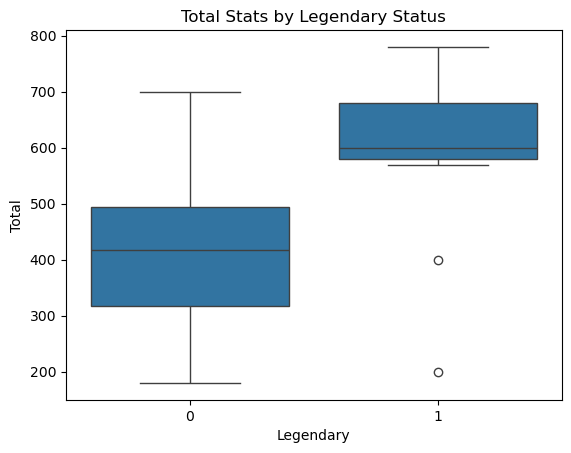

In [5]:
# First let's confirm that stats are just higher for Legendary Pokémon, using the total stat sum
sns.boxplot(x='Legendary', y='Total', data=data)
plt.title('Total Stats by Legendary Status')
plt.show()

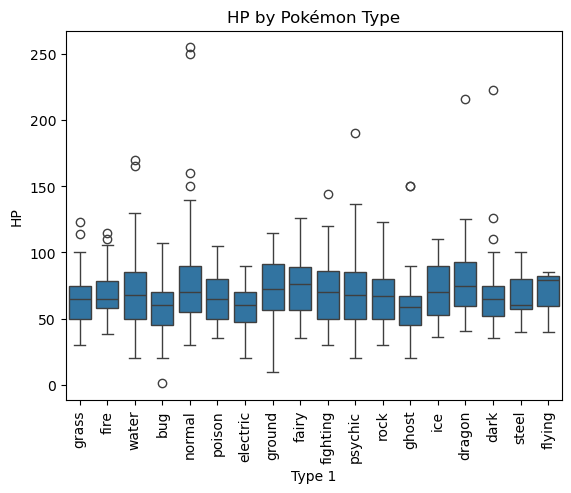

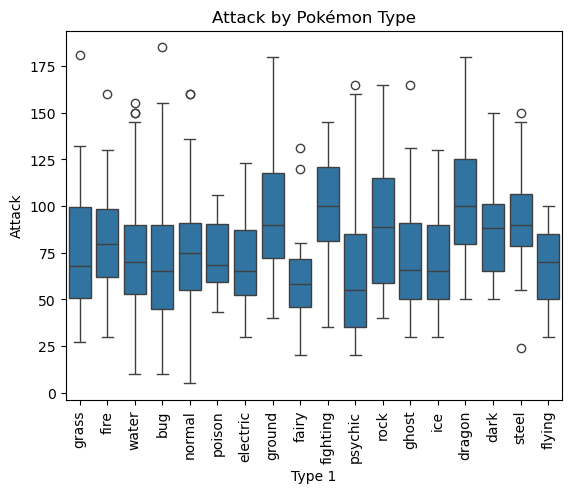

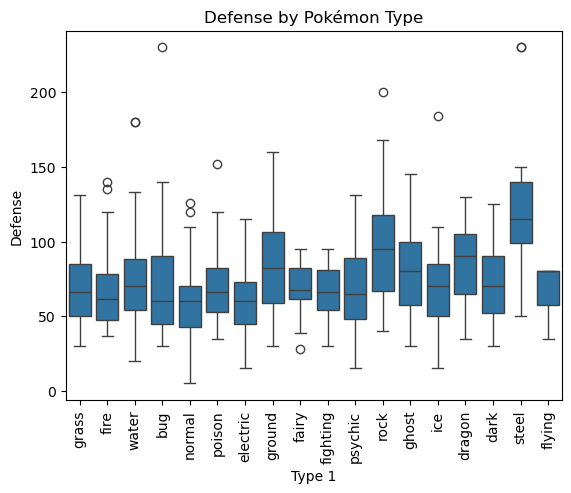

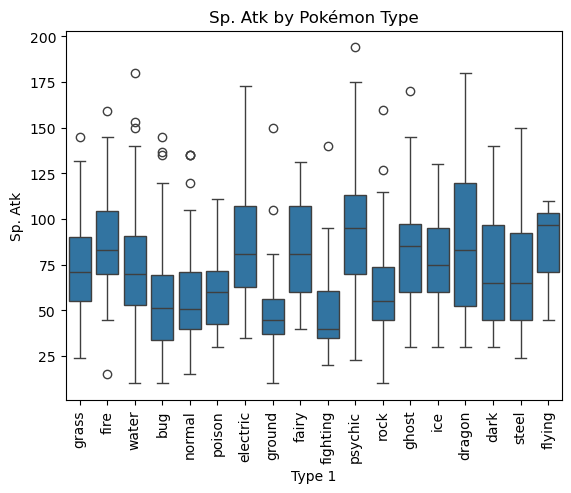

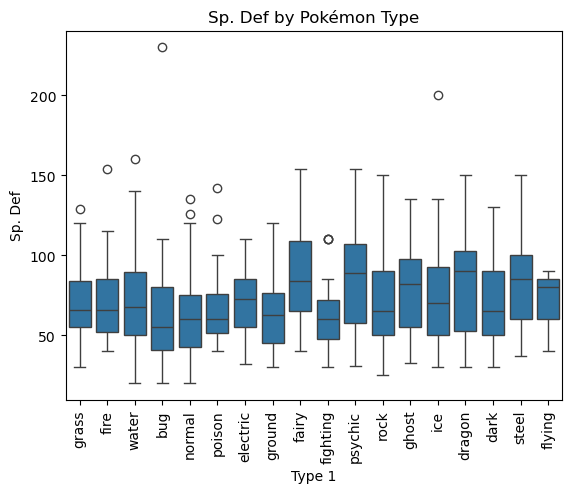

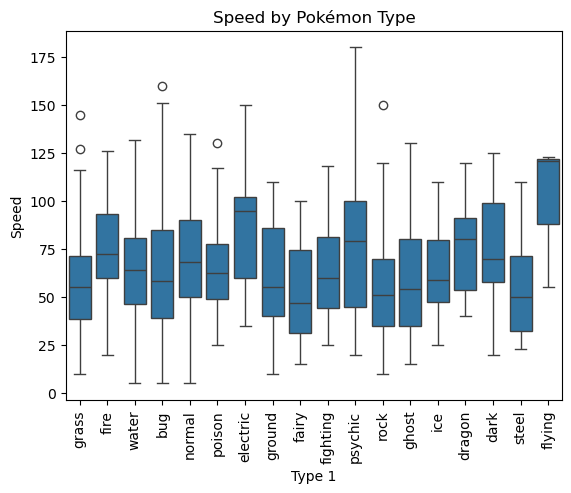

In [7]:
# Next look at each stat for each type
stat_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stat_list:
    sns.boxplot(x='Type 1', y=stat, data=data)
    plt.title(f'{stat} by Pokémon Type')
    plt.xticks(rotation=90)
    plt.show()
# Although some types overlap a lot in certain stats, there are some clear differences in others, so this should be useful for our model

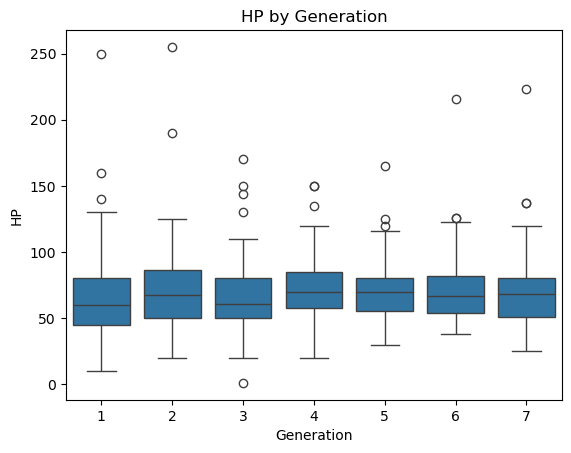

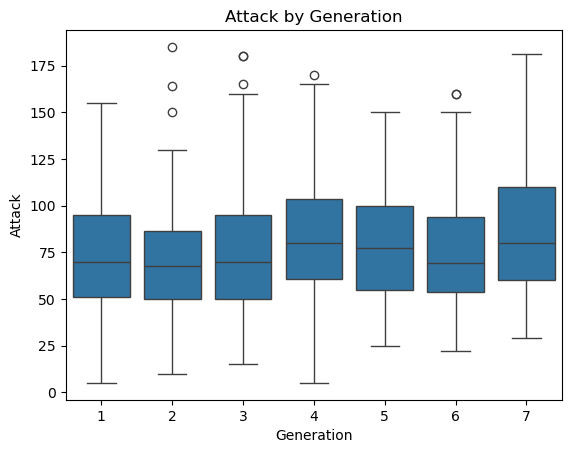

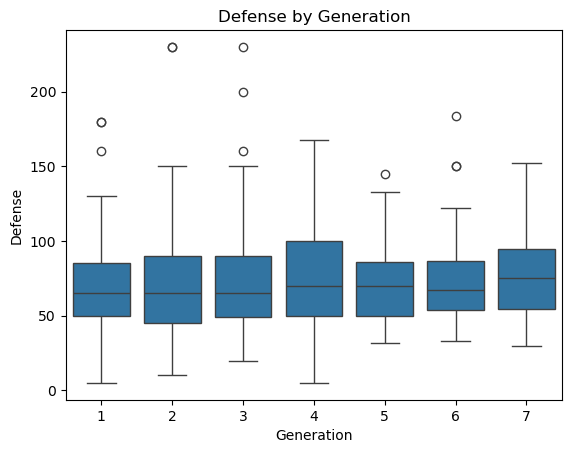

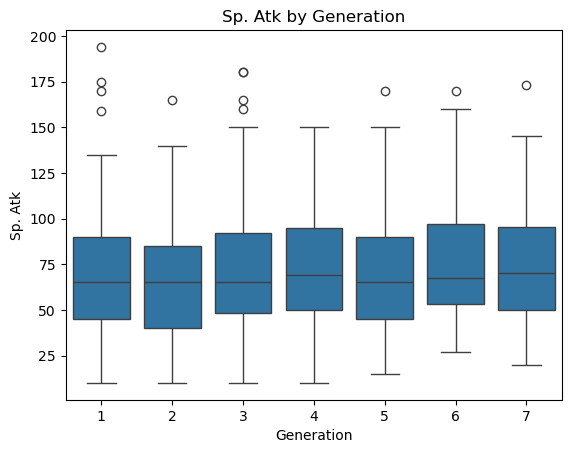

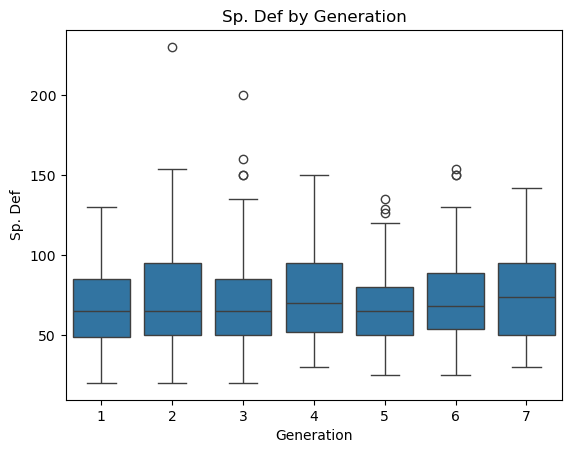

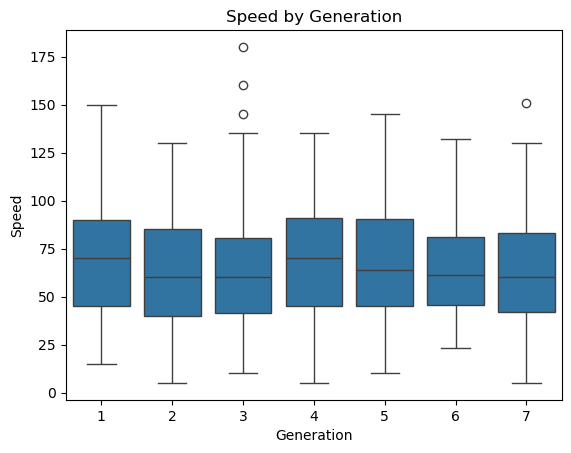

In [ ]:
# Next do the same but for each Gen
for stat in stat_list:
    sns.boxplot(x='Generation', y=stat, data=data)
    plt.title(f'{stat} by Generation')
    plt.show()
# Here there does not seem to be any relation, so we will not use Generation in our model
# (even with the addition of Gen 7 here)

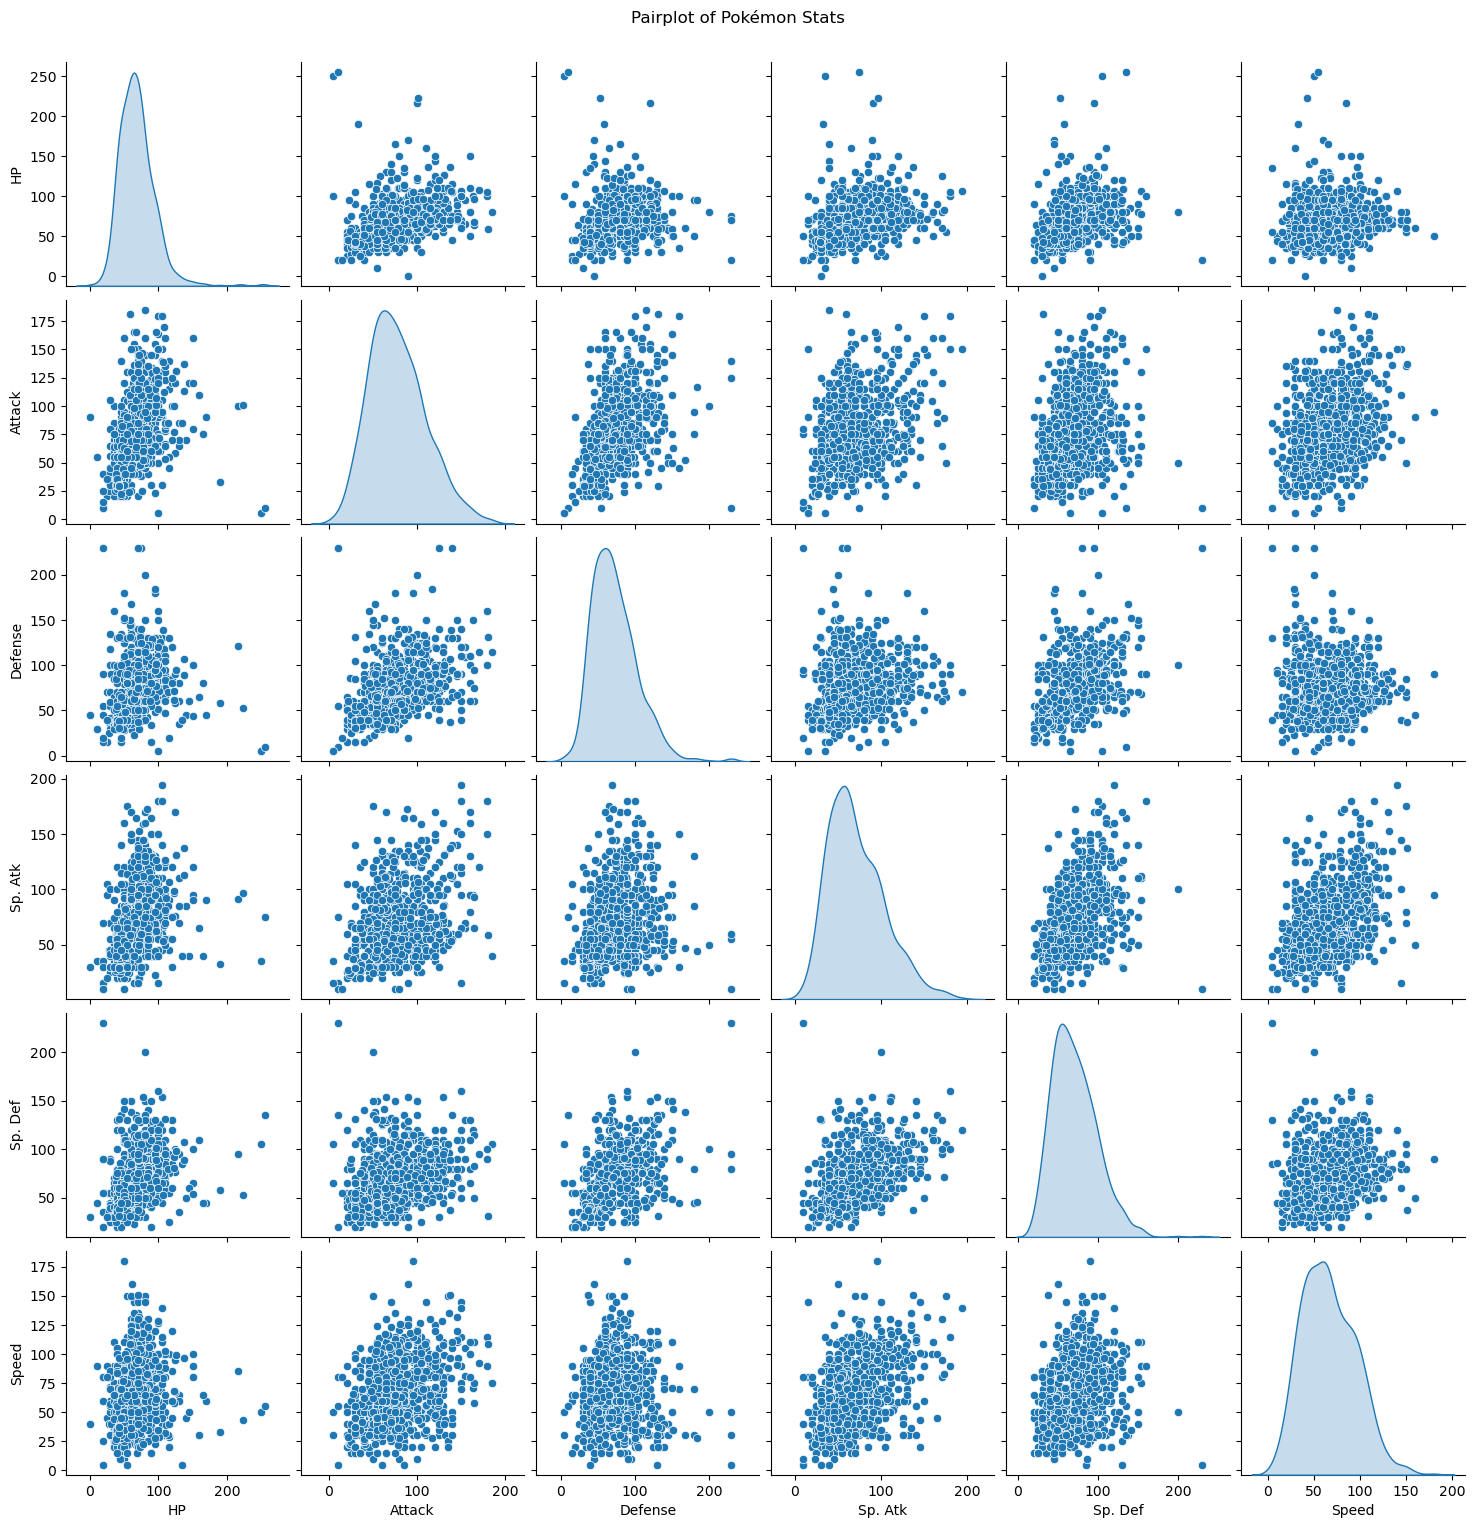

In [ ]:
# Check if we can see any relations between different stats, like Attack vs. Defense
sns.pairplot(data, vars=stat_list, diag_kind='kde')
plt.suptitle('Pairplot of Pokémon Stats', y=1.02)
plt.show()
# So there are no strict relations visible, as we mostly see big blobs
# The blobs aren't entirely round though, and in some cases like Attack vs Defense or Attack vs Special Attack
# you can see a somewhat linear trend

Now we look at the new features in this dataset.

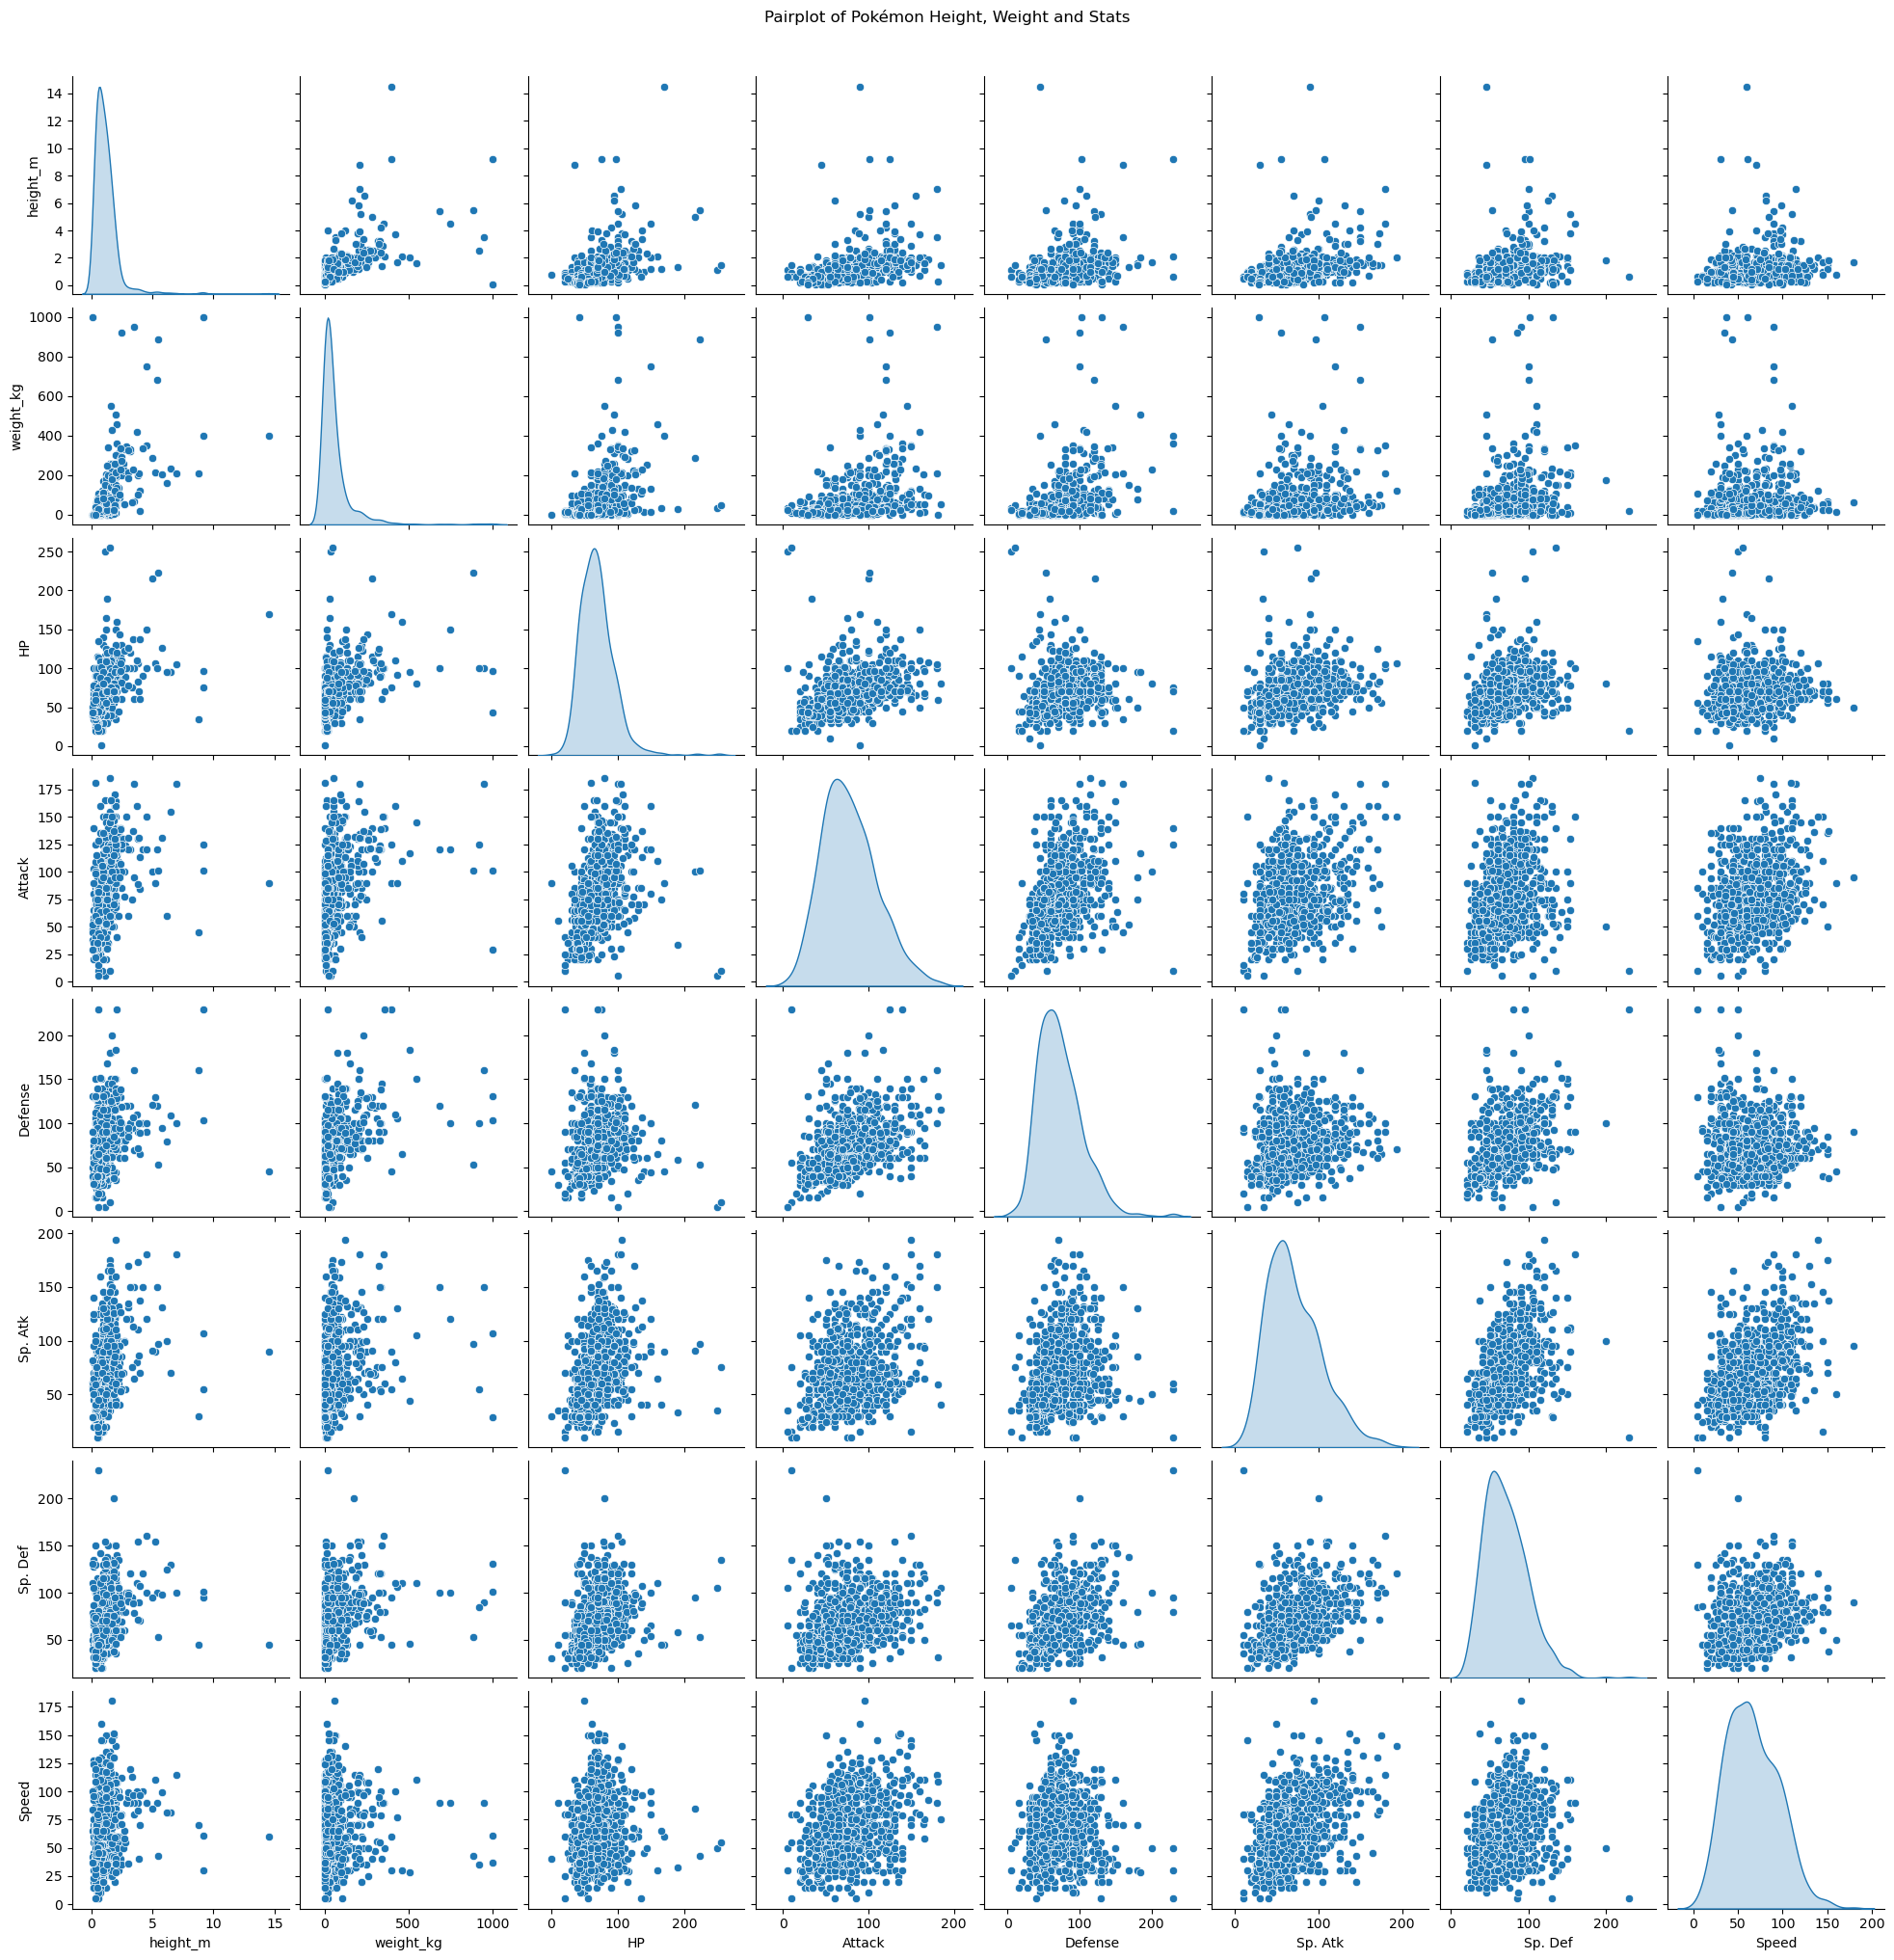

In [ ]:
# Check if height and weight have any relation to stats
sns.pairplot(data, vars=['height_m', 'weight_kg'] + stat_list, diag_kind='kde')
plt.suptitle('Pairplot of Pokémon Height, Weight and Stats', y=1.02)
plt.show()
# It doesn't seem like height or weight have any relation to stats, so we will not use them in our model
# In the first two columns you can see that for any stat, most points lie in a vertical line around the same height or weight;
# there are some outliers but they appear to be mostly random

In [ ]:
# For the capture rate we first need to fix some entries
# Find which entries are not numeric
non_numeric_capture_rate = data[~data['capture_rate'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_capture_rate[['Name', 'capture_rate']])

# Just hardcode the value for this one
data.loc[data['Name'] == 'Minior', 'capture_rate'] = 30
print(data.loc[data['Name'] == 'Minior', 'capture_rate'])

# Convert the capture rate to integers
data['capture_rate'] = data['capture_rate'].astype(int)

       Name              capture_rate
773  Minior  30 (Meteorite)255 (Core)
773    30
Name: capture_rate, dtype: object


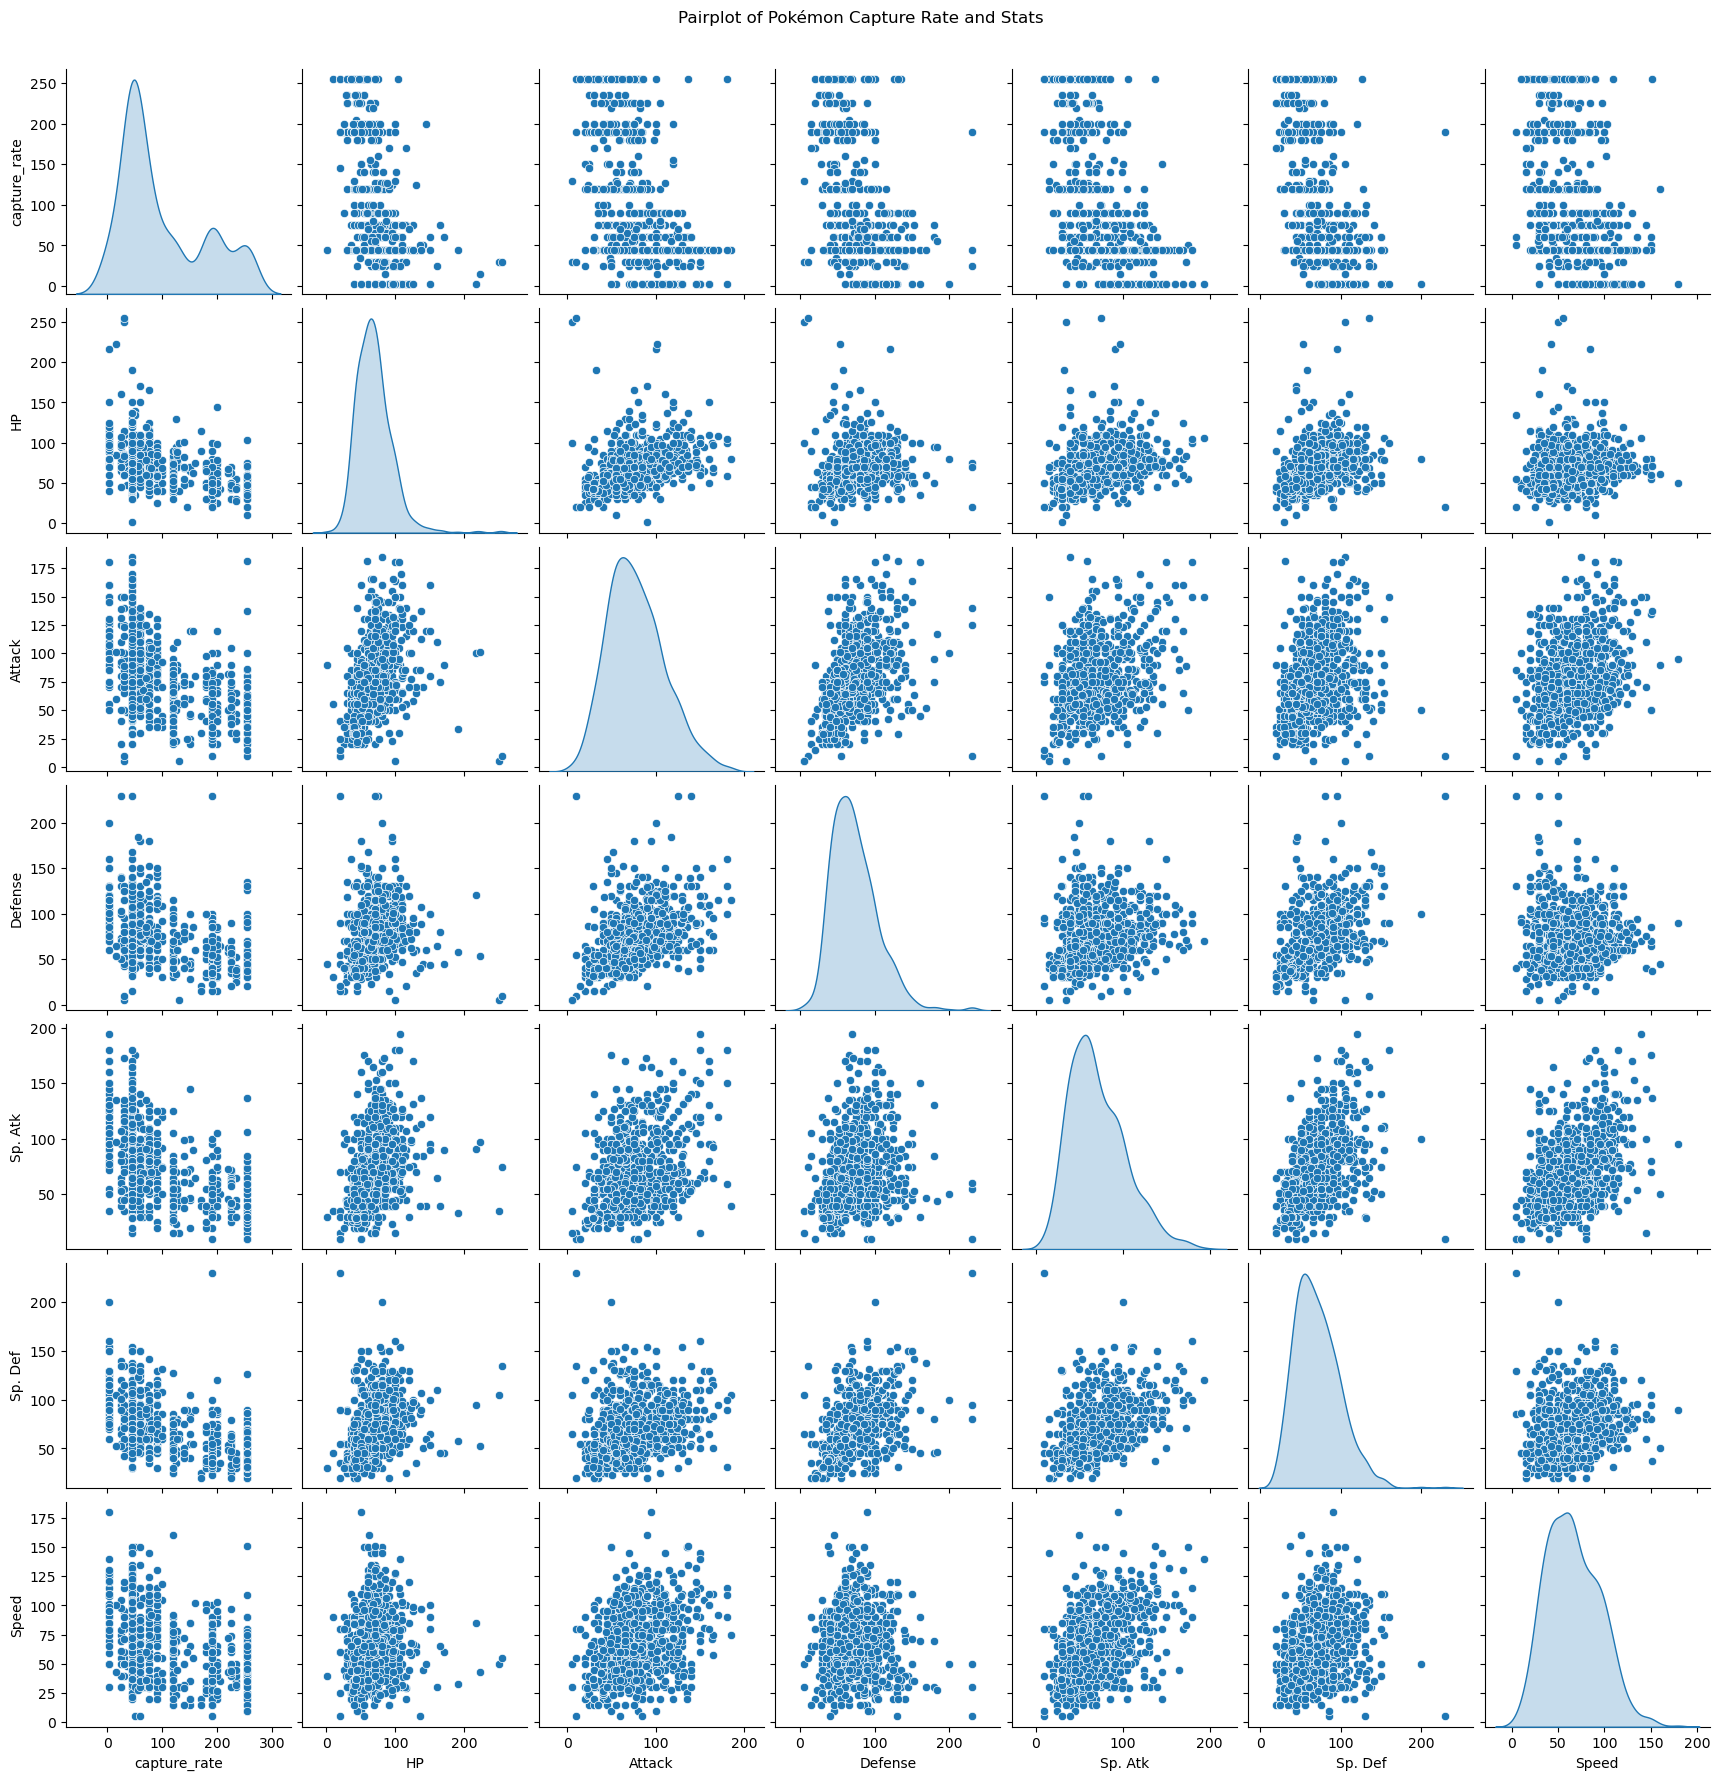

In [ ]:
# Check if capture rate has any relation to stats
sns.pairplot(data, vars=['capture_rate'] + stat_list, diag_kind='kde')
plt.suptitle('Pairplot of Pokémon Capture Rate and Stats', y=1.02)
plt.show()
# Again, there are no clear relations visible, so we will not use capture rate in our model
# You can see that the low capture rates mostly appear for Pokemon with higher stats, but these same low rates
# also often appear for Pokemon with low stats, and occasionally Pokemon with high rates have high stats too